In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-prize                 2024-06-27 23:59:00  Featured         $1,048,576        477           False  
https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability        2024-05-27 23:59:00  Featured           $105,000       3154           False  
https://www.kaggle.com/competitions/lmsys-chatbot-arena                            2024-08-05 23:59:00  Research           $100,000        181           False  
https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2  2024-07-02 23:59:00  Featured            $50,000       1238           False  
https://www.kaggle.com/competition

In [ ]:
!kaggle competitions download -c playground-series-s4e4

 83% 2.00M/2.41M [00:01<00:00, 2.25MB/s]
100% 2.41M/2.41M [00:01<00:00, 2.29MB/s]


In [ ]:
!unzip "/content/playground-series-s4e4.zip" -d "/content/drive/MyDrive/Kaggle_competitions/Abalone/"

Archive:  /content/playground-series-s4e4.zip
replace /content/drive/MyDrive/Kaggle_competitions/Abalone/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, log_loss, r2_score
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.compose import make_column_selector, make_column_transformer
import matplotlib.pyplot as plt
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.6 MB/s eta 0:00:00



Consider the Kaggle Competition at the link </br>
https://www.kaggle.com/competitions/playground-series-s4e4 on Abalone.</br>
 Try the following models:</br>
#### 1 . Linear Regression</br>
#### 2. Random Forest</br>
#### 3. X G Boost</br>
#### 4. Light GBM</br>
#### 5. Stacking with models of your choice</br>
</br>
Mention leaderboard scores for each of the five.</br>


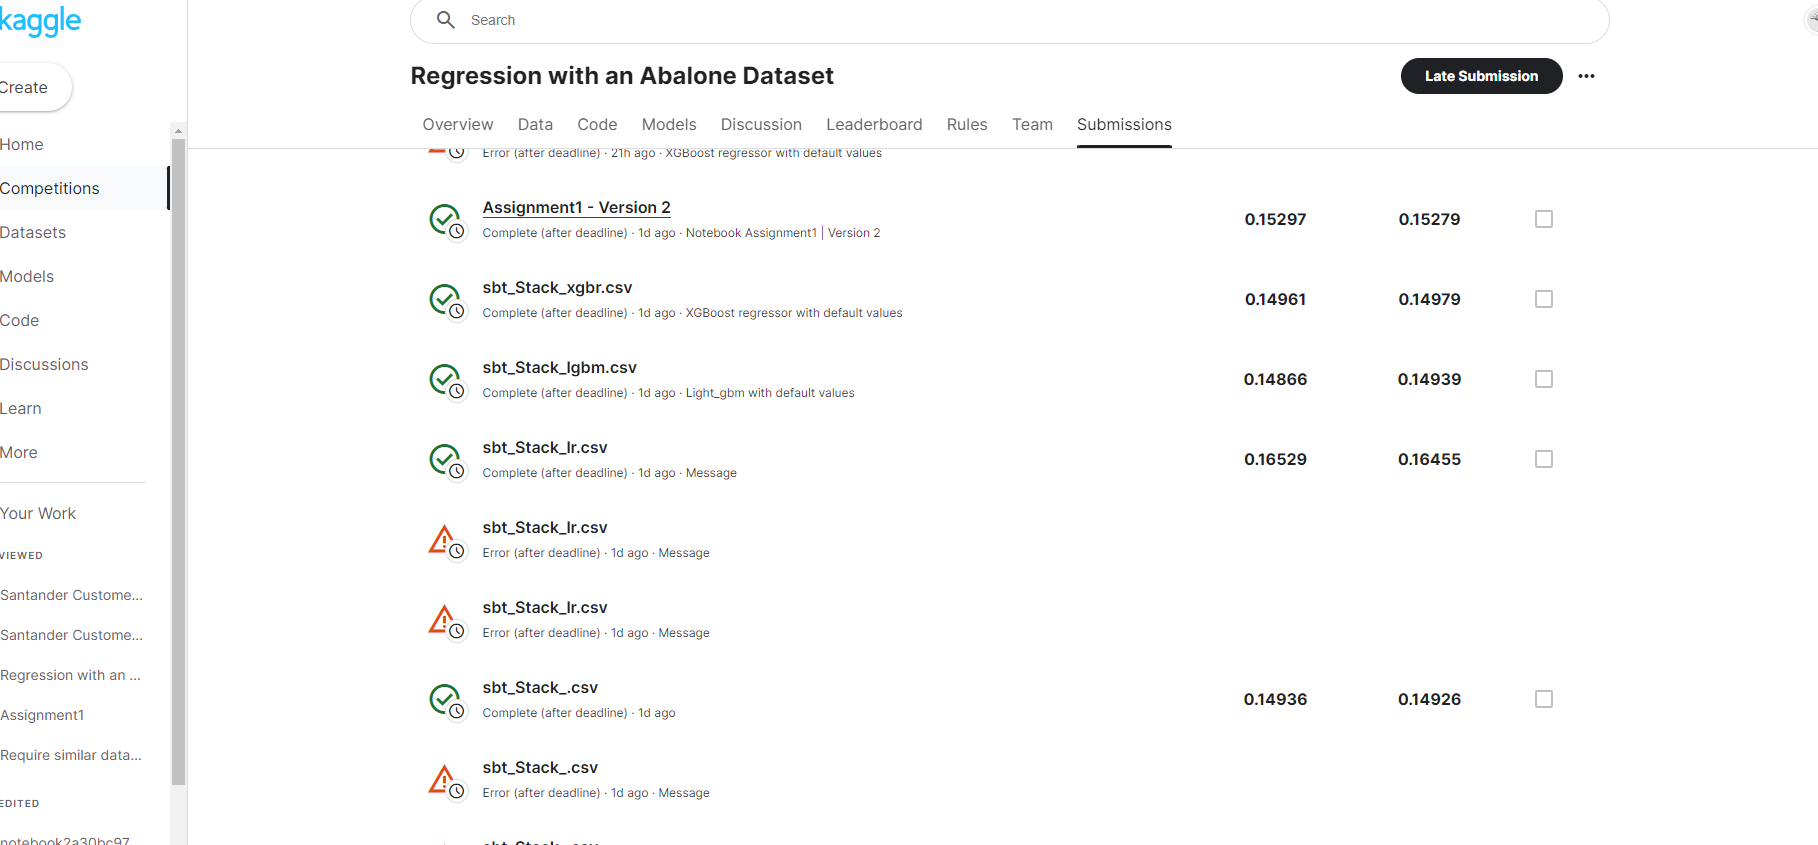

In [5]:
from IPython.display import Image
Image("KaggleScore.png")

In [ ]:

from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LinearRegression
#os.chdir(r'D:\CDAC MARCH 2024 AI\PML\Kaggle/1/')
# Flood Predicton Dataset
ftrain = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Abalone/train.csv', index_col=0)
ftest = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Abalone/test.csv')

y = ftrain['Rings']
X = pd.get_dummies(ftrain.drop('Rings',axis=1),drop_first=True)
X_test = pd.get_dummies(ftest.drop('id',axis=1), drop_first=True)




datasets={}
datasets['Abalone']= [X,y, X_test]


# cat = ['driveway','recroom','fullbase','gashw','prefarea','airco']
# cat = list(X.select_dtypes(include=object).columns)
# c_gbmr = CatBoostRegressor(random_state = 24, cat_features=cat)
rf = RandomForestRegressor(random_state=24)
xgbr = XGBRegressor(random_state=24)
l_gbmr = LGBMRegressor(random_state=24)
lr = LinearRegression()

models_dict = {'RandomForest':rf,
               'XGBoostRegressor': xgbr,
               'LightXGBoostRegressor':l_gbmr,
               'LinearRegression':lr}
scores_dict = {}
kFold = KFold(n_splits=5, random_state=24, shuffle=True)

# params = {'max_depth': [None, 2, 3, 4],
#           'n_estimators': [25, 50, 100],
#           'min_samples_leaf':np.arange(1,10,5),
#           'min_samples_split':np.arange(1,10,5)}
from sklearn.metrics import mean_squared_log_error

gcv = GridSearchCV(xgbr, param_grid={}, cv=kFold, scoring='neg_mean_squared_error', n_jobs=-1)
gcv.fit(X,y)
y_pred = gcv.predict(X_test)

y_pred[y_pred<0] = 0
df = pd.DataFrame({'id': ftest['id'], 'Rings':y_pred})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_xgbr.csv', index =False)

!kaggle competitions submit -c playground-series-s4e4 -f '/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_xgbr.csv' -m "XGBoost regressor with default values"


100% 963k/963k [00:01<00:00, 737kB/s]
Successfully submitted to Regression with an Abalone Dataset

In [ ]:
from sklearn.linear_model import ElasticNet
el = ElasticNet(random_state=24)
# Stack regression with 
# Linear Regression
# ElasticNet
# Light GBR
# Random Forest
stack = StackingRegressor([('LR',lr), ('EL',el), ('LGBMR', l_gbmr),('RF',rf),], passthrough=True, final_estimator=xgbr)
stack.fit(X,y)
y_pred = stack.predict(X_test)
y_pred[y_pred<0] = 0
df = pd.DataFrame({'id': ftest['id'], 'Rings':y_pred})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_.csv', index =False)

!kaggle competitions submit -c playground-series-s4e4 -f '/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_.csv' -m " Stacking with XGBoost regressor as final estimators"

In [ ]:
gcv = GridSearchCV(l_gbmr, param_grid={}, cv=kFold, scoring='neg_mean_squared_error', n_jobs=-1)
gcv.fit(X,y)
y_pred = gcv.predict(X_test)
y_pred[y_pred<0] = 0
df = pd.DataFrame({'id': ftest['id'], 'Rings':y_pred})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_l_gbmr.csv', index =False)

!kaggle competitions submit -c playground-series-s4e4 -f '/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_l_gbmr.csv' -m "l_gbmr regressor with default values"

In [ ]:
# Linear Regression

gcv = GridSearchCV(lr, param_grid={}, cv=kFold, scoring='neg_mean_squared_error', n_jobs=-1)
gcv.fit(X,y)
y_pred = gcv.predict(X_test)
y_pred[y_pred<0] = 0
df = pd.DataFrame({'id': ftest['id'], 'Rings':y_pred})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_lr.csv', index =False)

!kaggle competitions submit -c playground-series-s4e4 -f '/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_lr.csv' -m "linear Regression with default values"

In [ ]:
# Random Forest Regression
# done using kaggle notebook
gcv = GridSearchCV(rf, param_grid={}, cv=kFold, scoring='neg_mean_squared_error', n_jobs=-1)
gcv.fit(X,y)
y_pred = gcv.predict(X_test)
y_pred[y_pred<0] = 0
df = pd.DataFrame({'id': ftest['id'], 'Rings':y_pred})
df.to_csv('/kaggle/working/submission.csv.csv', index=False)

In [ ]:
!kaggle competitions submit -c playground-series-s4e4 -f '/content/drive/MyDrive/Kaggle_competitions/Abalone/sbt_Stack_lgbm.csv' -m "Message"

100% 1.45M/1.45M [00:02<00:00, 671kB/s] 
Successfully submitted to Regression with an Abalone Dataset

In [ ]:
!kaggle competitions submissions playground-series-s4e4

fileName          date                 description  status    publicScore  privateScore  
----------------  -------------------  -----------  --------  -----------  ------------  
sbt_Stack_lr.csv  2024-05-08 16:51:40  Message      complete  0.16455      0.16529       
sbt_Stack_lr.csv  2024-05-08 16:46:41  Message      error                                
sbt_Stack_lr.csv  2024-05-08 16:41:43  Message      error                                
sbt_Stack_.csv    2024-05-08 16:20:52               complete  0.14926      0.14936       
sbt_Stack_.csv    2024-05-08 16:15:10  Message      error                                
sbt_Stack_.csv    2024-05-07 02:39:19  Message      error                                
